<a href="https://colab.research.google.com/github/yoojeong-moon/prelab1/blob/main/1_BostonHousing_EDA_210621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston House Prices : EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df = pd.read_csv('/content/drive/MyDrive/bq-results-20210613-140043-bdo0aiat1o6a/bq-results-20210613-140043-bdo0aiat1o6a.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hard_Melbourne2.csv')
original = df

# Data 구조 파악

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,NaN
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,NaN


In [5]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,3.0,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0,NaN
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0,NaN
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0,NaN
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,NaN
23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26-08-2017,6.3,3013.0,4.0,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0,NaN


In [6]:
df.shape

(23547, 22)

In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Description'],
      dtype='object')

In [8]:
df.info()


# non-null : Suburb, Address, Rooms, Type, Method, SellerG, Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23547 non-null  object 
 1   Address        23547 non-null  object 
 2   Rooms          23547 non-null  int64  
 3   Type           23547 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         23547 non-null  object 
 6   SellerG        23547 non-null  object 
 7   Date           23547 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       19066 non-null  float64
 11  Bathroom       19063 non-null  float64
 12  Car            18921 non-null  float64
 13  Landsize       17410 non-null  float64
 14  BuildingArea   10018 non-null  float64
 15  YearBuilt      11540 non-null  float64
 16  CouncilArea    15656 non-null  object 
 17  Lattitude      19243 non-null  float64
 18  Longti

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Description
count,23547.000000,1.839600e+04,23546.000000,23546.000000,19066.000000,19063.000000,18921.000000,17410.000000,10018.000000,11540.000000,19243.000000,19243.000000,23546.000000,0.0
mean,2.981102,1.056697e+06,10.304222,3109.782893,2.951956,1.570897,1.626235,551.783458,154.527895,1964.636742,-37.812434,145.000287,7517.480591,NaN
std,1.237364,6.419217e+05,6.019455,94.522190,0.996032,0.712684,0.974048,3544.288014,462.535765,37.595504,0.079926,0.106071,4414.995634,NaN
min,1.000000,8.500000e+04,-13.900000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.184180,144.431620,129.000000,NaN
25%,2.000000,6.330000e+05,6.200000,3047.000000,2.000000,1.000000,1.000000,181.000000,95.000000,1940.000000,-37.859300,144.939300,4385.000000,NaN
50%,3.000000,8.800000e+05,9.500000,3101.000000,3.000000,1.000000,2.000000,448.000000,129.000000,1970.000000,-37.809700,145.004300,6567.000000,NaN
75%,4.000000,1.302000e+06,13.000000,3150.000000,4.000000,2.000000,2.000000,656.000000,180.000000,2000.000000,-37.759800,145.063100,10331.000000,NaN
max,120.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.407580,145.526350,21650.000000,NaN


# Visualization for EDA

## Histogram

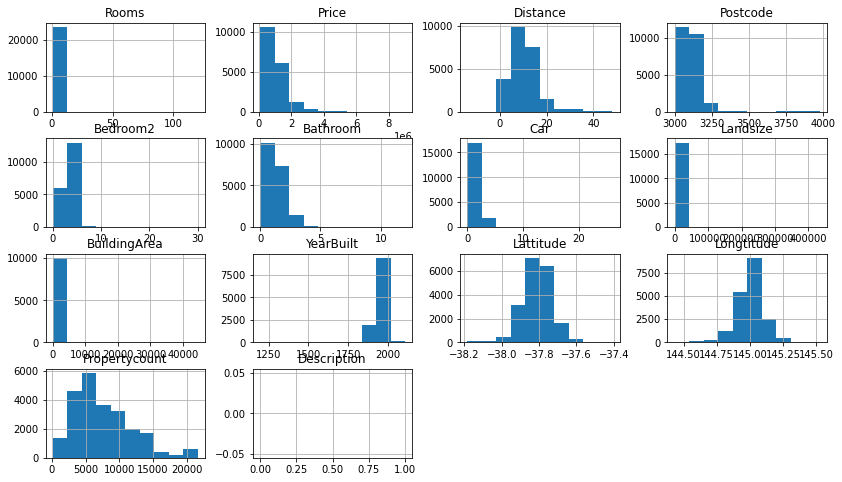

In [ ]:
plt.rcParams['figure.figsize'] = [14, 8]

hist = df.hist()

## Feature Selection - Variables of Corrleation >= 0.3


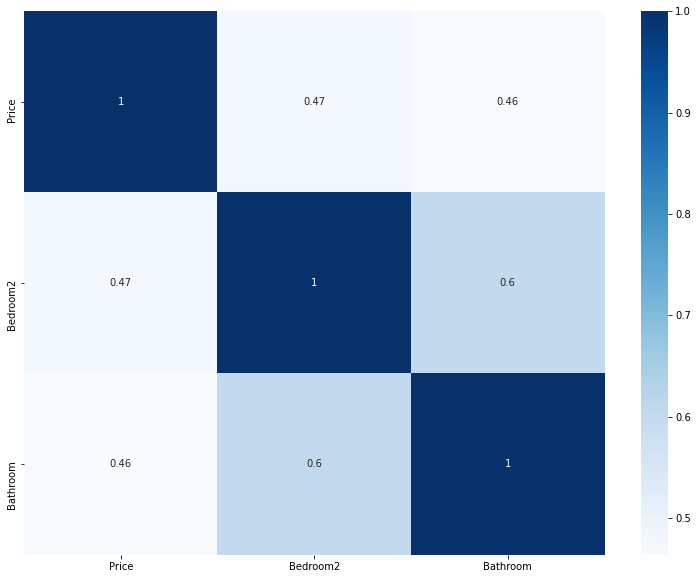

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["Price"])>=0.45]
top_corr_features
plt.figure(figsize=(13,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")



In [ ]:
list(df.columns)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23547 non-null  object 
 1   Address        23547 non-null  object 
 2   Rooms          23547 non-null  int64  
 3   Type           23547 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         23547 non-null  object 
 6   SellerG        23547 non-null  object 
 7   Date           23547 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       19066 non-null  float64
 11  Bathroom       19063 non-null  float64
 12  Car            18921 non-null  float64
 13  Landsize       17410 non-null  float64
 14  BuildingArea   10018 non-null  float64
 15  YearBuilt      11540 non-null  float64
 16  CouncilArea    15656 non-null  object 
 17  Lattitude      19243 non-null  float64
 18  Longti

## Pair Plot

In [10]:
df_l = df[df.columns.difference(['Description', 'Regionname', 'Longtitude', 'Lattitude', 'Date', 'Postcode', 'Address', 'Type', 'SellerG'])]

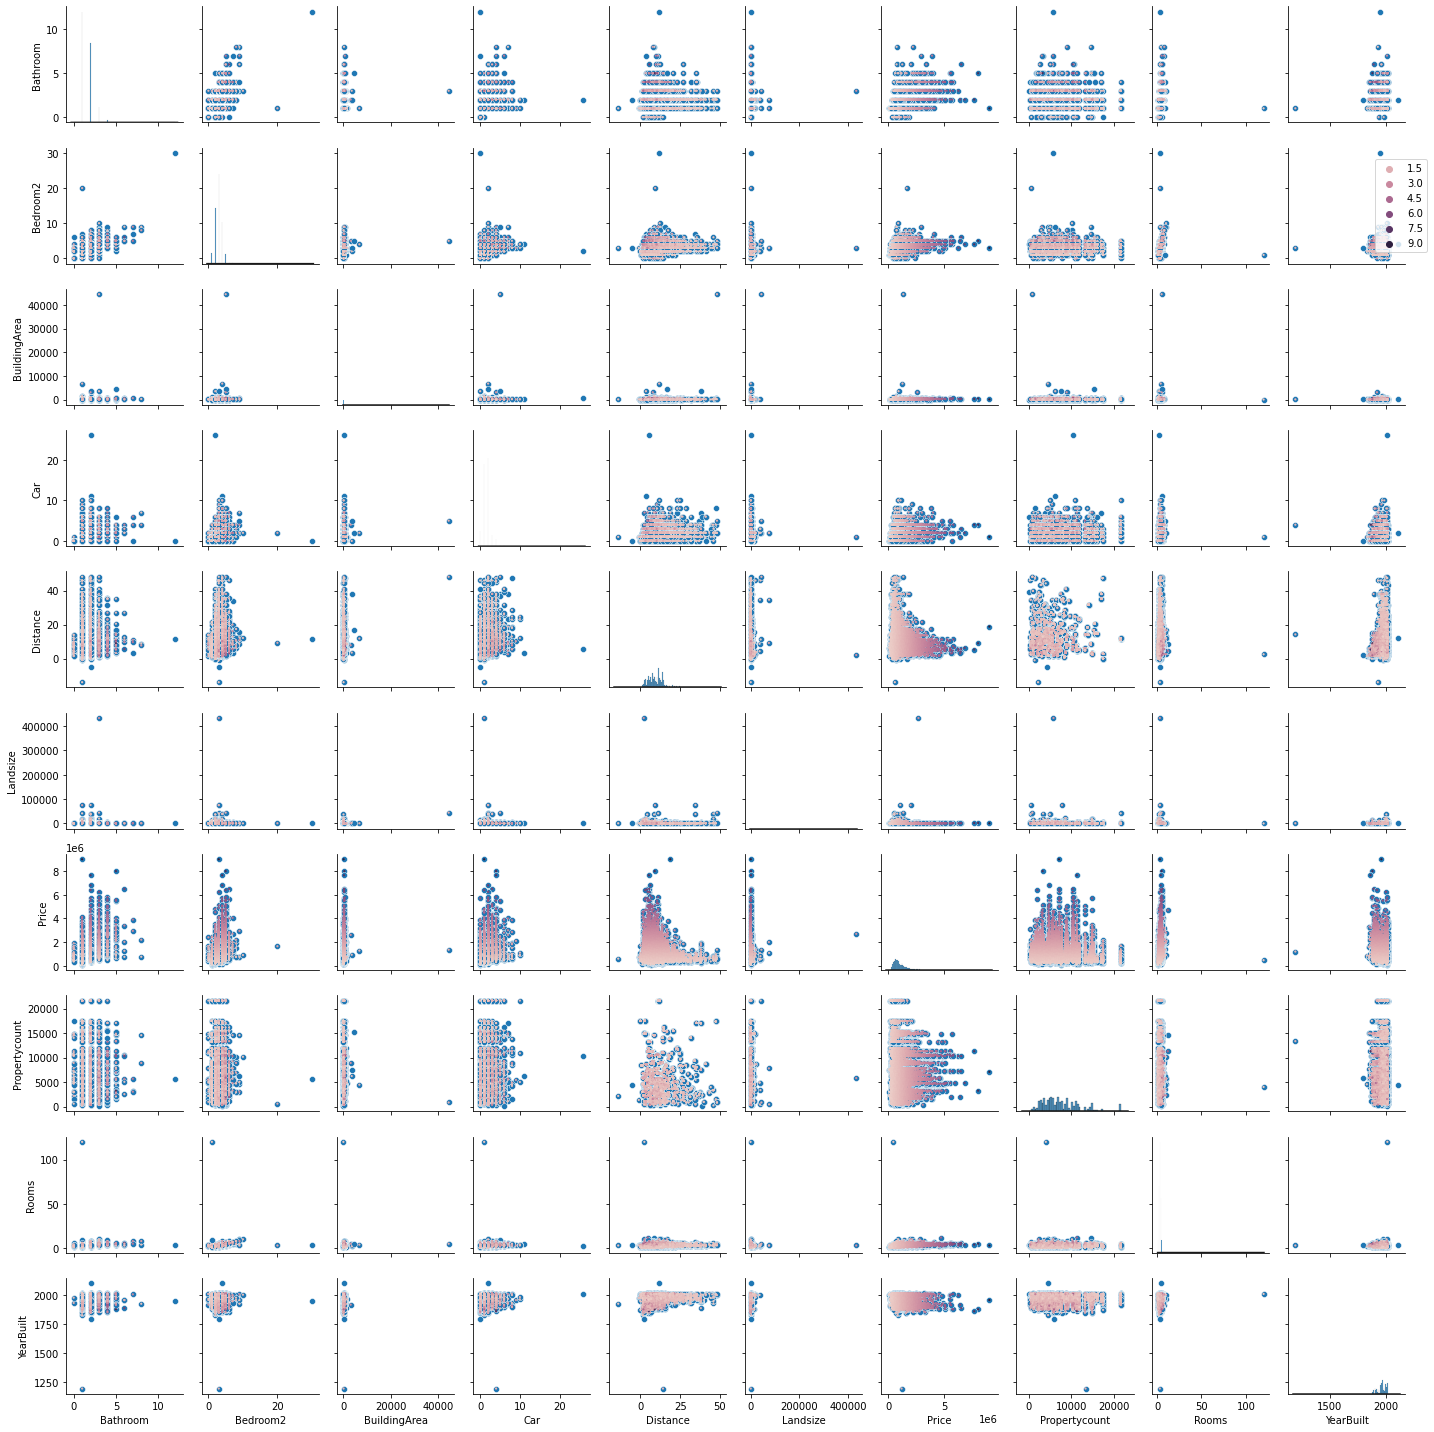

In [11]:

g = sns.pairplot(df_l, height=2)
g.map_diag(sns.kdeplot, color=".1")
g.map_offdiag(sns.scatterplot, hue=df["Price"], s=5, linewidth=0)
g.axes[1, -1].legend(loc="center left", bbox_to_anchor=(.7, .5))

plt.tight_layout()

# Missing Value
## Finding total missing values (column-wise)

In [14]:
df.isnull().sum().sort_values(ascending=False).head(10)

Description     23547
BuildingArea    13529
YearBuilt       12007
CouncilArea      7891
Landsize         6137
Price            5151
Car              4626
Bathroom         4484
Bedroom2         4481
Lattitude        4304
dtype: int64

## Finding Total Missing Values (Row-wise)

In [15]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

18523    14
17100    11
16232    11
20968    11
6313     11
6310     11
6299     11
6293     11
16225    11
6289     11
dtype: int64

## Columns containing atleast one missing value 

In [16]:
df.isnull().sum() > 0

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
Description       True
dtype: bool

In [17]:
d = df.isnull().any()
d

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
Description       True
dtype: bool

##### any() operates on columns by default

In [18]:
d.index

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Description'],
      dtype='object')

In [19]:
d.values

array([False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [20]:
d.index[d.values]

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Description'],
      dtype='object')

## Displaying rows that contain atleast one missing value

In [21]:
df.isnull().any(axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
23542    True
23543    True
23544    True
23545    True
23546    True
Length: 23547, dtype: bool

In [22]:
d = df.isnull().any(axis=1)
d

0        True
1        True
2        True
3        True
4        True
         ... 
23542    True
23543    True
23544    True
23545    True
23546    True
Length: 23547, dtype: bool

In [23]:
d.index

RangeIndex(start=0, stop=23547, step=1)

In [24]:
d.values
len(d),len(df)

(23547, 23547)

In [25]:
m = d.index[d.values]
m

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            23537, 23538, 23539, 23540, 23541, 23542, 23543, 23544, 23545,
            23546],
           dtype='int64', length=23547)

In [26]:
df.iloc[m,:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,NaN
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,3.0,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0,NaN
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0,NaN
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0,NaN
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,NaN


### Columns having all missing values

In [28]:
df.isnull().all(axis=0)

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
Description       True
dtype: bool

### Rows having all missing values

In [29]:
df.isnull().all(axis=1).sum()

0

In [30]:
df.isnull().sum(axis=1)==15

0        False
1        False
2        False
3        False
4        False
         ...  
23542    False
23543    False
23544    False
23545    False
23546    False
Length: 23547, dtype: bool

### drop column 

In [65]:
### drop column 

d_columns = ['Description', 'Postcode', 'Address', 'SellerG']
df_d = df[df.columns.difference(d_columns)]

df_d.head()

,Bathroom,Bedroom2,BuildingArea,Car,CouncilArea,Date,Distance,Landsize,Lattitude,Longtitude,Method,Price,Propertycount,Regionname,Rooms,Suburb,Type,YearBuilt
0,1.0,2.0,NaN,1.0,Yarra,03-09-2016,2.5,126.0,-37.8014,144.9958,SS,NaN,4019.0,Northern Metropolitan,2,Abbotsford,h,NaN
1,1.0,2.0,NaN,1.0,Yarra,03-12-2016,2.5,202.0,-37.7996,144.9984,S,1480000.0,4019.0,Northern Metropolitan,2,Abbotsford,h,NaN
2,1.0,2.0,79.0,0.0,Yarra,04-02-2016,2.5,156.0,-37.8079,144.9934,S,1035000.0,4019.0,Northern Metropolitan,2,Abbotsford,h,1900.0
3,2.0,3.0,NaN,1.0,Yarra,04-02-2016,2.5,0.0,-37.8114,145.0116,VB,NaN,4019.0,Northern Metropolitan,3,Abbotsford,u,NaN
4,2.0,3.0,150.0,0.0,Yarra,04-03-2017,2.5,134.0,-37.8093,144.9944,SP,1465000.0,4019.0,Northern Metropolitan,3,Abbotsford,h,1900.0


In [66]:
df_d.Suburb.value_counts()  # 336개? ...
df_d.Type.value_counts()  # 3개
df_d.CouncilArea.value_counts()

Boroondara           1677
Moreland             1421
Stonnington          1141
Moonee Valley        1141
Darebin              1113
Glen Eira            1019
Port Phillip          849
Maribyrnong           836
Yarra                 836
Banyule               763
Bayside               677
Melbourne             582
Hobsons Bay           505
Brimbank              490
Monash                458
Whitehorse            432
Manningham            379
Kingston              235
Hume                  200
Whittlesea            196
Wyndham               128
Maroondah             114
Knox                  100
Melton                 78
Greater Dandenong      78
Frankston              67
Casey                  49
Nillumbik              41
Yarra Ranges           27
Cardinia               10
Macedon Ranges          9
Moorabool               2
Mitchell                2
Unavailable             1
Name: CouncilArea, dtype: int64

### Percentage of missing values (Column-wise)

In [67]:
df_d.isnull().sum(axis=0).sort_values(ascending=False)/len(df) * 100

BuildingArea     57.455302
YearBuilt        50.991634
CouncilArea      33.511700
Landsize         26.062768
Price            21.875398
Car              19.645815
Bathroom         19.042766
Bedroom2         19.030025
Longtitude       18.278337
Lattitude        18.278337
Propertycount     0.004247
Distance          0.004247
Regionname        0.004247
Method            0.000000
Type              0.000000
Date              0.000000
Rooms             0.000000
Suburb            0.000000
dtype: float64

In [68]:
round(df_d.isnull().sum(axis=0).sort_values(ascending=False)/len(df) * 100, 2)

BuildingArea     57.46
YearBuilt        50.99
CouncilArea      33.51
Landsize         26.06
Price            21.88
Car              19.65
Bathroom         19.04
Bedroom2         19.03
Longtitude       18.28
Lattitude        18.28
Propertycount     0.00
Distance          0.00
Regionname        0.00
Method            0.00
Type              0.00
Date              0.00
Rooms             0.00
Suburb            0.00
dtype: float64

## Removing three columns with the highest missing values

In [70]:
col = df_d.isnull().sum().sort_values(ascending=False).head(3).index.values
col

array(['BuildingArea', 'YearBuilt', 'CouncilArea'], dtype=object)

In [71]:
df_d2 = df_d.drop(col,axis=1)
df_d2

,Bathroom,Bedroom2,Car,Date,Distance,Landsize,Lattitude,Longtitude,Method,Price,Propertycount,Regionname,Rooms,Suburb,Type
0,1.0,2.0,1.0,03-09-2016,2.5,126.0,-37.80140,144.99580,SS,NaN,4019.0,Northern Metropolitan,2,Abbotsford,h
1,1.0,2.0,1.0,03-12-2016,2.5,202.0,-37.79960,144.99840,S,1480000.0,4019.0,Northern Metropolitan,2,Abbotsford,h
2,1.0,2.0,0.0,04-02-2016,2.5,156.0,-37.80790,144.99340,S,1035000.0,4019.0,Northern Metropolitan,2,Abbotsford,h
3,2.0,3.0,1.0,04-02-2016,2.5,0.0,-37.81140,145.01160,VB,NaN,4019.0,Northern Metropolitan,3,Abbotsford,u
4,2.0,3.0,0.0,04-03-2017,2.5,134.0,-37.80930,144.99440,SP,1465000.0,4019.0,Northern Metropolitan,3,Abbotsford,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,1.0,3.0,0.0,26-08-2017,27.2,552.0,-37.90032,144.61839,PN,NaN,5262.0,Western Metropolitan,3,Wyndham Vale,u
23543,NaN,NaN,NaN,26-08-2017,27.2,NaN,-37.87882,144.60184,S,NaN,5262.0,Western Metropolitan,4,Wyndham Vale,h
23544,3.0,4.0,2.0,26-08-2017,12.7,NaN,-37.72006,145.10547,S,1100000.0,1369.0,Northern Metropolitan,4,Yallambie,h
23545,1.0,4.0,1.0,26-08-2017,6.3,362.0,-37.81188,144.88449,SP,1285000.0,6543.0,Western Metropolitan,4,Yarraville,h


In [72]:
round(df_d2.isnull().sum(axis=0).sort_values(ascending=False)/len(df) * 100, 2)

Landsize         26.06
Price            21.88
Car              19.65
Bathroom         19.04
Bedroom2         19.03
Longtitude       18.28
Lattitude        18.28
Regionname        0.00
Propertycount     0.00
Distance          0.00
Type              0.00
Suburb            0.00
Rooms             0.00
Method            0.00
Date              0.00
dtype: float64

### Rows with more than 5 missing values

In [73]:
df_d2[df_d2.isnull().sum(axis=1)>5]

,Bathroom,Bedroom2,Car,Date,Distance,Landsize,Lattitude,Longtitude,Method,Price,Propertycount,Regionname,Rooms,Suburb,Type
15,NaN,NaN,NaN,08-10-2016,2.5,NaN,NaN,NaN,S,1000000.0,4019.0,Northern Metropolitan,3,Abbotsford,h
16,NaN,NaN,NaN,08-10-2016,2.5,NaN,NaN,NaN,S,745000.0,4019.0,Northern Metropolitan,2,Abbotsford,t
19,NaN,NaN,NaN,08-10-2016,2.5,NaN,NaN,NaN,S,542000.0,4019.0,Northern Metropolitan,2,Abbotsford,u
21,NaN,NaN,NaN,10-12-2016,2.5,NaN,NaN,NaN,SP,760000.0,4019.0,Northern Metropolitan,2,Abbotsford,u
22,NaN,NaN,NaN,10-12-2016,2.5,NaN,NaN,NaN,SP,481000.0,4019.0,Northern Metropolitan,1,Abbotsford,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23495,NaN,NaN,NaN,26-08-2017,12.4,NaN,NaN,NaN,PI,550000.0,5420.0,Eastern Metropolitan,2,Templestowe Lower,u
23499,NaN,NaN,NaN,26-08-2017,7.0,NaN,NaN,NaN,PI,770000.0,8870.0,Northern Metropolitan,2,Thornbury,t
23502,NaN,NaN,NaN,26-08-2017,7.0,NaN,NaN,NaN,S,858000.0,8870.0,Northern Metropolitan,2,Thornbury,t
23508,NaN,NaN,NaN,26-08-2017,4.1,NaN,NaN,NaN,VB,720000.0,7217.0,Southern Metropolitan,2,Toorak,u


In [74]:
len(df_d2[df_d2.isnull().sum(axis=1)>5])/len(df_d2) * 100

18.16791948018856

In [75]:
round(len(df_d2[df_d2.isnull().sum(axis=1)>5])/len(df_d2) * 100,2)

18.17

### Retaining rows with <=5 NAN values

In [76]:
df_d3 = df_d2[df_d2.isnull().sum(axis=1)<=5]

In [77]:
df_d3

print(df_d2.shape)  # 23547
print(df_d3.shape)  # 19269
print(round(len(df_d3)/len(df_d2) * 100 ,2))  #  81.83 % remain

(23547, 15)
(19269, 15)
81.83


In [78]:
round(df_d3.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d3) * 100, 2)

Price            21.71
Landsize          9.65
Car               1.81
Bathroom          1.07
Bedroom2          1.05
Longtitude        0.13
Lattitude         0.13
Type              0.00
Suburb            0.00
Rooms             0.00
Regionname        0.00
Propertycount     0.00
Method            0.00
Distance          0.00
Date              0.00
dtype: float64

### Removing the rows where Price is missing  #### df_d4

In [79]:
df_d4 = df_d3[df_d3['Price'].notnull()]

In [80]:
df_d4.head()

,Bathroom,Bedroom2,Car,Date,Distance,Landsize,Lattitude,Longtitude,Method,Price,Propertycount,Regionname,Rooms,Suburb,Type
1,1.0,2.0,1.0,03-12-2016,2.5,202.0,-37.7996,144.9984,S,1480000.0,4019.0,Northern Metropolitan,2,Abbotsford,h
2,1.0,2.0,0.0,04-02-2016,2.5,156.0,-37.8079,144.9934,S,1035000.0,4019.0,Northern Metropolitan,2,Abbotsford,h
4,2.0,3.0,0.0,04-03-2017,2.5,134.0,-37.8093,144.9944,SP,1465000.0,4019.0,Northern Metropolitan,3,Abbotsford,h
5,2.0,3.0,1.0,04-03-2017,2.5,94.0,-37.7969,144.9969,PI,850000.0,4019.0,Northern Metropolitan,3,Abbotsford,h
6,1.0,3.0,2.0,04-06-2016,2.5,120.0,-37.8072,144.9941,VB,1600000.0,4019.0,Northern Metropolitan,4,Abbotsford,h


In [81]:
round(df_d4.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d4) * 100, 2)

Landsize         9.83
Car              1.76
Bathroom         1.07
Bedroom2         1.05
Longtitude       0.15
Lattitude        0.15
Type             0.00
Suburb           0.00
Rooms            0.00
Regionname       0.00
Propertycount    0.00
Price            0.00
Method           0.00
Distance         0.00
Date             0.00
dtype: float64

In [82]:
round(df_d4.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d4) * 100, 2)

Landsize         9.83
Car              1.76
Bathroom         1.07
Bedroom2         1.05
Longtitude       0.15
Lattitude        0.15
Type             0.00
Suburb           0.00
Rooms            0.00
Regionname       0.00
Propertycount    0.00
Price            0.00
Method           0.00
Distance         0.00
Date             0.00
dtype: float64

In [83]:
round(df_d4.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d4) * 100, 2)

Landsize         9.83
Car              1.76
Bathroom         1.07
Bedroom2         1.05
Longtitude       0.15
Lattitude        0.15
Type             0.00
Suburb           0.00
Rooms            0.00
Regionname       0.00
Propertycount    0.00
Price            0.00
Method           0.00
Distance         0.00
Date             0.00
dtype: float64

## Treating the remaining missing values i.e. RM and INDUS column

In [ ]:
# df_d4.loc[:,['BuildingArea','YearBuilt']].describe()

In [ ]:
# df_d4.groupby('BuildingArea').Landsize.count().sort_values(ascending = False)

BuildingArea
120.0    114
110.0     89
100.0     88
130.0     84
115.0     77
        ... 
638.0      0
857.0      0
859.0      0
999.0      0
23.0       0
Name: Landsize, Length: 613, dtype: int64

In [ ]:
# df_d4.loc[:,'BuildingArea'].fillna(2, inplace=True)

In [84]:
round(df_d4.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d3) * 100, 2)

Landsize         7.70
Car              1.38
Bathroom         0.84
Bedroom2         0.83
Longtitude       0.11
Lattitude        0.11
Type             0.00
Suburb           0.00
Rooms            0.00
Regionname       0.00
Propertycount    0.00
Price            0.00
Method           0.00
Distance         0.00
Date             0.00
dtype: float64

In [87]:
df_d4.groupby('Landsize').Price.count().sort_values(ascending=False)

Landsize
0.0         1942
650.0        103
697.0         71
700.0         48
585.0         47
            ... 
1465.0         1
76000.0        1
1459.0         1
1458.0         1
433014.0       1
Name: Price, Length: 1449, dtype: int64

In [98]:
def Landsize_impute(data):
  data1 = data.copy()
  # data1['Landsize_null'] = data1['Landsize'].apply(lambda x : 1 if pd.isnull(x) else 0)
  data2 = data1.groupby('Price')['Landsize']
  data1['Landsize'] = data2.transform(lambda x : x.fillna(x.mean()))

  return data1

df_d5 = Landsize_impute(df_d4)

In [ ]:
# df.loc[:,'RM`'].fillna(1, inplace=True)

In [99]:
round(df_d5.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d5) * 100, 2)

Car              1.76
Bathroom         1.07
Bedroom2         1.05
Landsize         0.64
Longtitude       0.15
Lattitude        0.15
Type             0.00
Suburb           0.00
Rooms            0.00
Regionname       0.00
Propertycount    0.00
Price            0.00
Method           0.00
Distance         0.00
Date             0.00
dtype: float64

# Impute NaN of numeric data to ‘mean’


In [100]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_d5[['Car','Bathroom', 'Bedroom2', 'Landsize']] )


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [105]:
df_d5[['Car','Bathroom', 'Bedroom2', 'Landsize']] =imputer.transform(df_d5[['Car','Bathroom', 'Bedroom2', 'Landsize']])
round(df_d5.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d5) * 100, 2)

Longtitude       0.15
Lattitude        0.15
Type             0.00
Suburb           0.00
Rooms            0.00
Regionname       0.00
Propertycount    0.00
Price            0.00
Method           0.00
Landsize         0.00
Distance         0.00
Date             0.00
Car              0.00
Bedroom2         0.00
Bathroom         0.00
dtype: float64

In [108]:
df_d6 = df_d5.dropna(axis = 0, subset = ['Longtitude', 'Lattitude'])

round(df_d6.isnull().sum(axis=0).sort_values(ascending=False)/len(df_d6) * 100, 2)

Type             0.0
Suburb           0.0
Rooms            0.0
Regionname       0.0
Propertycount    0.0
Price            0.0
Method           0.0
Longtitude       0.0
Lattitude        0.0
Landsize         0.0
Distance         0.0
Date             0.0
Car              0.0
Bedroom2         0.0
Bathroom         0.0
dtype: float64

# OneHotEncoding

In [109]:
for i in df_d6.columns:
  cnt=df_d6[i].groupby(df_d6[i]).nunique().count()
  if cnt < 10:
    print(i,cnt)



Method 5
Regionname 8
Type 3


In [111]:
df_d6.groupby(['Method']).nunique().index


Index(['PI', 'S', 'SA', 'SP', 'VB'], dtype='object', name='Method')

In [112]:
ls = ['Method', 'Regionname', 'Type']

rm_dummy_df1 = pd.get_dummies(df_d6[ls[0]]).add_prefix('Method_')
rm_dummy_df2 = pd.get_dummies(df_d6[ls[1]]).add_prefix('Regionname_')
rm_dummy_df3 = pd.get_dummies(df_d6[ls[2]]).add_prefix('Type_')

df2=df_d6.drop(ls,axis=1)
df3=pd.merge(df2,rm_dummy_df1, left_index=True, right_index=True)
df4=pd.merge(df3,rm_dummy_df2, left_index=True, right_index=True)
df5=pd.merge(df4,rm_dummy_df3, left_index=True, right_index=True)

In [113]:
df5.head

<bound method NDFrame.head of        Bathroom  Bedroom2  Car  ... Type_h  Type_t  Type_u
1           1.0       2.0  1.0  ...      1       0       0
2           1.0       2.0  0.0  ...      1       0       0
4           2.0       3.0  0.0  ...      1       0       0
5           2.0       3.0  1.0  ...      1       0       0
6           1.0       3.0  2.0  ...      1       0       0
...         ...       ...  ...  ...    ...     ...     ...
23540       2.0       2.0  1.0  ...      0       1       0
23541       1.0       4.0  5.0  ...      1       0       0
23544       3.0       4.0  2.0  ...      1       0       0
23545       1.0       4.0  1.0  ...      1       0       0
23546       2.0       4.0  2.0  ...      1       0       0

[15064 rows x 28 columns]>

# Outlier Dection


In [114]:
outlier_up = df_d6.mean() + df_d6.std() *3 
outlier_down = df_d6.mean() - df_d6.std() *3 

In [115]:
outlier_up_found = df_d6[df_d6 > outlier_up]
outlier_up_found_count=outlier_up_found.count()
outlier_up_found_count


Bathroom         153
Bedroom2          93
Car              150
Date               0
Distance         297
Landsize          26
Lattitude         25
Longtitude        54
Method             0
Price            260
Propertycount    397
Regionname         0
Rooms             14
Suburb             0
Type               0
dtype: int64

In [116]:
col='Bathroom'
df_d6[df_d6[col] > outlier_up[col] ][col]


202      4.0
616      7.0
642      5.0
650      4.0
756      5.0
        ... 
22204    5.0
22232    4.0
22365    4.0
22928    4.0
23190    5.0
Name: Bathroom, Length: 153, dtype: float64

In [118]:
# !
col='Propertycount'
df_d6[df_d6[col] > outlier_up[col] ][col]


8322     21650.0
8328     21650.0
8330     21650.0
8333     21650.0
8334     21650.0
          ...   
23399    21650.0
23400    21650.0
23401    21650.0
23402    21650.0
23403    21650.0
Name: Propertycount, Length: 397, dtype: float64

In [119]:
col='Price'
df[df[col] > outlier_up[col] ][col]


166      3010000.0
178      4735000.0
182      3755000.0
387      3625000.0
388      3000000.0
           ...    
23256    3080000.0
23274    3610000.0
23284    3400000.0
23433    4500000.0
23479    3100000.0
Name: Price, Length: 322, dtype: float64

In [120]:
outlier_down_found = df_d6[df_d6 < outlier_down]
outlier_down_found.count()

Bathroom           0
Bedroom2          16
Car                0
Date               0
Distance           1
Landsize           0
Lattitude        133
Longtitude       146
Method             0
Price              0
Propertycount      0
Regionname         0
Rooms              0
Suburb             0
Type               0
dtype: int64

In [122]:
col='Bedroom2'
df_d6[df_d6[col] < outlier_down[col] ][col]


218      0.0
1390     0.0
1424     0.0
1549     0.0
3812     0.0
5547     0.0
10107    0.0
11193    0.0
11234    0.0
12013    0.0
12217    0.0
13558    0.0
14708    0.0
15294    0.0
16322    0.0
18304    0.0
Name: Bedroom2, dtype: float64